Quais passageiros sobreviveram ao titanic?

In [64]:
# 1 Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
#import 

In [65]:
# 2 importando as bases de dados de treino e de teste:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [81]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [82]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_binario  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


None

In [83]:
train_df = train_df.fillna(-1) #preenchendo dados vazios com -1, já que retirar tais linhas reduziria muito a base de dados

In [84]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Sex_binario  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


None

In [85]:
# suposição teste: mulheres sobrevivem mais que homens (exemplo Kaggle)
woman = train_df.loc[train_df["Sex"] == "female","Survived"]
rate_woman = sum(woman)/len(woman)

man = train_df.loc[train_df["Sex"] == "male","Survived"]
rate_man = sum(man)/len(man)
print("{:.4}% das mulheres sobreviveram enquanto apenas {:.3}% dos homens sobreviveram" .format(rate_woman*100, rate_man*100))


74.2% das mulheres sobreviveram enquanto apenas 18.9% dos homens sobreviveram


Treino -> Validação -> Teste

In [69]:
#Criando variavel para transformar em número o texto de male e female:
def transformar_sex(valor):
    if valor == "female":
        return 1
    else:
        return 0

#aplicando a função para cada linha, criando a coluna Sex_binario
train_df["Sex_binario"] = train_df["Sex"].map(transformar_sex)
#Realizando teste apenas com as colunas Sex e Age
train_X = train_df[["Sex_binario", "Age"]]
train_X = train_X.fillna(-1)


In [70]:
#np.random.seed(0) #fixa a semente de aleatoriedade da segregação

#Segregando os próprios dados de treino em treino e teste (validação, nesse caso)
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, random_state = 0, test_size= 0.5) 

In [71]:
#chamando o algoritmo RandomForest
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

#treinando o modelo com os dados
modelo.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [75]:
#Fazendo a predição (validação)
pred_valid = modelo.predict(X_valid)

In [74]:
#Checando a acurácia do treino comparando aos dados de validação:
ac_valid = np.mean(y_valid == p_valid)
ac_valid

0.7690582959641256

Validação Cruzada aula 4 (mario filho)

In [76]:
#Validação cruzada
from sklearn.model_selection import RepeatedKFold
resultados = []
kf = RepeatedKFold(n_splits= 2, n_repeats= 10, random_state = 10)

for linhas_treino, linhas_valid in kf.split(train_X):
    print("Treino: ", linhas_treino.shape[0])
    print("Valid: ", linhas_valid.shape[0])

    X_train, X_valid = train_X.iloc[linhas_treino], train_X.iloc[linhas_valid]
    y_train, y_valid = train_y.iloc[linhas_treino], train_y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state= 0)
    modelo.fit(X_train, y_train)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc: ", acc)
    print()
    

Treino:  445
Valid:  446
Acc:  0.7511210762331838

Treino:  446
Valid:  445
Acc:  0.7617977528089888

Treino:  445
Valid:  446
Acc:  0.7533632286995515

Treino:  446
Valid:  445
Acc:  0.7595505617977528

Treino:  445
Valid:  446
Acc:  0.7690582959641256

Treino:  446
Valid:  445
Acc:  0.7573033707865169

Treino:  445
Valid:  446
Acc:  0.7399103139013453

Treino:  446
Valid:  445
Acc:  0.7595505617977528

Treino:  445
Valid:  446
Acc:  0.7354260089686099

Treino:  446
Valid:  445
Acc:  0.797752808988764

Treino:  445
Valid:  446
Acc:  0.7690582959641256

Treino:  446
Valid:  445
Acc:  0.7640449438202247

Treino:  445
Valid:  446
Acc:  0.7757847533632287

Treino:  446
Valid:  445
Acc:  0.7573033707865169

Treino:  445
Valid:  446
Acc:  0.7556053811659192

Treino:  446
Valid:  445
Acc:  0.7640449438202247

Treino:  445
Valid:  446
Acc:  0.7443946188340808

Treino:  446
Valid:  445
Acc:  0.7595505617977528

Treino:  445
Valid:  446
Acc:  0.7533632286995515

Treino:  446
Valid:  445
Acc:  0

In [78]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

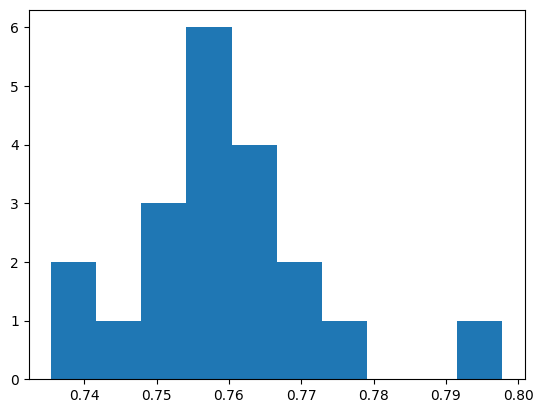

In [79]:
pylab.hist(resultados)

Otimizando o modelo Random Forest

In [ ]:
#